In [1]:
# test circularly symmetric Gaussian with KDE/surface plot
# some magic from https://github.com/ciortanmadalina/modality_tests/blob/master/2Dkde.ipynb
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# core function: circularly symmetric complex normal distribution
def circ_complex_normal(m, n, mean=None, cov=None):
    if type(mean)==type(None):
        mean = np.zeros(2)
    if type(cov)==type(None):
        cov = np.eye(2)
    # generate i.i.d complex samples
    re,im = np.random.multivariate_normal(mean, cov, m*n).T
    out = np.zeros((m,n),dtype=complex)
    k=0
    for i in range(m):
        for j in range(n):
            temp = re[k] + 1j*im[k]
            out[i,j] = temp
            k=k+1
    return out

x.shape: (10000,)
y.shape: (10000,)
-0.49906505942929347 0.47395727517443 -0.4392838219614929 0.5044360154797322
xmin: -0.49906505942929347 - xmax: 0.47395727517443 - ymin: -0.4392838219614929 - ymax: 0.5044360154797322 


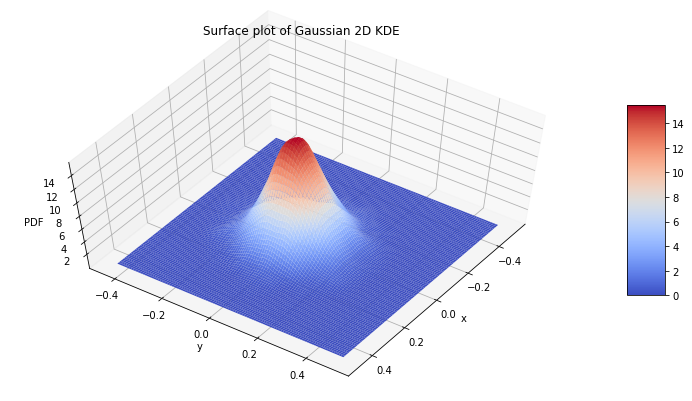

In [2]:
# test helper function which converts between complex
var_E = 0.01
M = int(1e2)
N = int(1e2)
x = np.zeros(M*N)
y = np.zeros(M*N)
cov = var_E*np.eye(2)
norm_mat = circ_complex_normal(M,N,cov=cov)
k = 0
for i in range(M):
    for j in range(N):
        samp = norm_mat[i,j]
        x_temp = np.real(samp)
        y_temp = np.imag(samp)
        x[k] = x_temp
        y[k] = y_temp
        k=k+1
# check dimensions of data
print('x.shape: {}'.format(x.shape))
print('y.shape: {}'.format(y.shape))
# boundaries of KDE
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
print("xmin: {} - xmax: {} - ymin: {} - ymax: {} ".format(xmin,xmax,ymin,ymax))
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
# fit the kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
# 3D surface plot of kernel
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
plt.show()

In [3]:
# describe vars
print("--- Describe real components --- ")
print(st.describe(x))
print("--- Describe imag components --- ")
print(st.describe(y))

--- Describe real components --- 
DescribeResult(nobs=10000, minmax=(-0.4179798648789832, 0.3928720806241197), mean=0.0016861688597075923, variance=0.010120443541700563, skewness=-0.029241879581039056, kurtosis=0.06974569538639486)
--- Describe imag components --- 
DescribeResult(nobs=10000, minmax=(-0.36064050217472415, 0.4257926956929634), mean=-0.0009279410982242181, variance=0.010196237720610632, skewness=0.02194505775492803, kurtosis=0.004659094341066705)
